Dica obtida do link abaixo:

[https://github.com/fabianomorelli/ipython_notebooks/blob/master/exemplos_geopandas/exemplos_geopandas.ipynb](https://github.com/fabianomorelli/ipython_notebooks/blob/master/exemplos_geopandas/exemplos_geopandas.ipynb)

# Importação das bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

/home/gui/anaconda3/envs/trabalho/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Abertura do arquivo

Este arquivo possui as seguintes informações com dados desde: 01 a 21/06/2022.

```bash
Dia,Lat,Lon,RH,TEMP,PREC,NDCS
2022-06-01,-10.016,-52.0302,57.9,29.12228,0,17
2022-06-01,-10.5451,-48.6571,55.4,29.42227,0.6055942,25
2022-06-01,-10.6989,-50.4621,41.5,33.12228,0,17
2022-06-01,-11.3727,-48.8964,47.9,30.62228,0,39
```

In [2]:
arquivo = '/mnt/d/gui/testes/grade150km/output/meteorologia/202206.csv'

df = pd.read_csv(arquivo)

df

,Dia,Lat,Lon,RH,TEMP,PREC,NDCS
0,2022-06-01,-10.0160,-52.0302,57.9,29.12228,0.000000,17
1,2022-06-01,-10.5451,-48.6571,55.4,29.42227,0.605594,25
2,2022-06-01,-10.6989,-50.4621,41.5,33.12228,0.000000,17
3,2022-06-01,-11.3727,-48.8964,47.9,30.62228,0.000000,39
4,2022-06-01,-11.4011,-48.8929,46.9,30.82226,0.000000,27
...,...,...,...,...,...,...,...
4587,2022-06-21,-22.0765,-55.7600,46.7,26.80233,0.000000,4
4588,2022-06-21,-22.2174,-56.0270,45.2,28.00231,0.000000,10
4589,2022-06-21,-22.2157,-56.2054,40.3,30.00231,0.058992,10
4590,2022-06-21,-22.2160,-56.0173,45.2,28.00231,0.000000,10


# Criação do geodataframe

In [3]:
# Prepara um novo atributo do tipo geometry utilizando a funcao Point do shapely para depois criar um geopandas
# esta variavel row eh soh pra ajudar a entender que ele vai pegar pra cada linha o atributo entre chaves
geometry = df.apply(lambda row: Point(row['Lon'], row['Lat']), axis=1)

# Cria uma variável com referência ao sistema de projeção cartográfica.
crs = {'init': 'epsg:4326'}

# Cria um geodataframe com o dataframe anterior. Neste caso, utilizando o mesmo nome, 
# porém pode-se utilizar outro.
df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

/home/gui/anaconda3/envs/trabalho/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/home/gui/anaconda3/envs/trabalho/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [4]:
# Para checar a projeção.
df.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Checar se é um geodataframe.
type(df)

geopandas.geodataframe.GeoDataFrame

In [6]:
# Informações do geodataframe.
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dia       4592 non-null   object  
 1   Lat       4592 non-null   float64 
 2   Lon       4592 non-null   float64 
 3   RH        4592 non-null   float64 
 4   TEMP      4592 non-null   float64 
 5   PREC      4592 non-null   float64 
 6   NDCS      4592 non-null   int64   
 7   geometry  4592 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(1)
memory usage: 287.1+ KB


<AxesSubplot:>

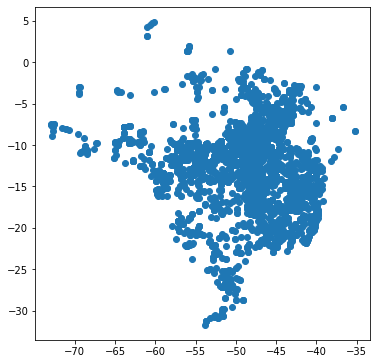

In [7]:
# Realiza um plot básico.
df.plot(figsize=(6,12))

# Abertura do arquivo shapefile

<AxesSubplot:>

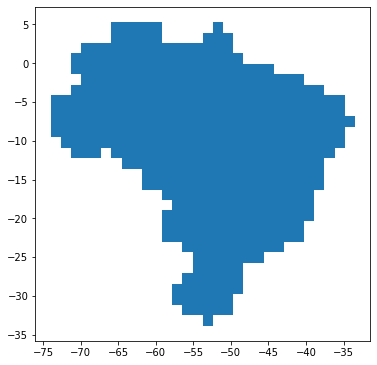

In [8]:
# Abertura do arquivo shapefile do Brasil com a divisão dos estados que será utilizado para fazer o sjoin (spatial join).
brasil = gpd.read_file("/mnt/d/gui/testes/grade150km/shapefile/grade_br_150km/Grade_BR_150km.shp")

brasil.plot(figsize=(6,12))

In [9]:
# Para checar a projeção. Tem que ser o mesmo do geodataframe. Caso não seja. basta utilizar:
# brasil.to_crs(epsg='4326') que é o mesmo do geodataframe.
brasil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Informações do shapefile.
brasil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        458 non-null    float64 
 1   left      458 non-null    float64 
 2   top       458 non-null    float64 
 3   right     458 non-null    float64 
 4   bottom    458 non-null    float64 
 5   geometry  458 non-null    geometry
dtypes: float64(5), geometry(1)
memory usage: 21.6 KB


In [11]:
# Visualização das informações do shapefile.
brasil.head()

,id,left,top,right,bottom,geometry
0,8.0,-73.99045,-4.178159,-72.64045,-5.528159,"POLYGON ((-73.99378 -4.14148, -72.64378 -4.141..."
1,9.0,-73.99045,-5.528159,-72.64045,-6.878159,"POLYGON ((-73.99378 -5.49148, -72.64378 -5.491..."
2,10.0,-73.99045,-6.878159,-72.64045,-8.228159,"POLYGON ((-73.99378 -6.84148, -72.64378 -6.841..."
3,11.0,-73.99045,-8.228159,-72.64045,-9.578159,"POLYGON ((-73.99378 -8.19148, -72.64378 -8.191..."
4,37.0,-72.64045,-4.178159,-71.29045,-5.528159,"POLYGON ((-72.64378 -4.14148, -71.29378 -4.141..."


# Realiza o sjoin (spatial join) para unir os dois geodataframe

Antes, tem que instalar as bibliotecas abaixo caso não esteja instalada.

In [12]:
# pip install pygeos
# pip install rtree

In [13]:
# Realiza a filtragem espacial dos focos dentro do polígono, no caso, o dataframe "brasil".
# Como são muitas informações contida no dataframe "brasil", serão mantidas as colunas "id" e "geometry".
filtrado = gpd.sjoin(df, brasil[['id','geometry']], how='inner', op='within')

/home/gui/anaconda3/envs/trabalho/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_195/1783337803.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  filtrado = gpd.sjoin(df, brasil[['id','geometry']], how='inner', op='within')


In [14]:
# Visualiza o geodataframe filtrado.
filtrado

,Dia,Lat,Lon,RH,TEMP,PREC,NDCS,geometry,index_right,id
0,2022-06-01,-10.0160,-52.0302,57.9,29.12228,0.0,17,POINT (-52.03020 -10.01600),251,476.0
227,2022-06-02,-10.0594,-52.1635,51.7,28.94869,0.0,18,POINT (-52.16350 -10.05940),251,476.0
231,2022-06-02,-10.2501,-51.8299,53.9,28.94869,0.0,18,POINT (-51.82990 -10.25010),251,476.0
233,2022-06-02,-10.2512,-51.7739,53.9,28.94869,0.0,18,POINT (-51.77390 -10.25120),251,476.0
234,2022-06-02,-10.2515,-51.8389,53.9,28.94869,0.0,18,POINT (-51.83890 -10.25150),251,476.0
...,...,...,...,...,...,...,...,...,...,...
4450,2022-06-21,-15.7906,-57.2536,32.3,30.00231,0.0,3,POINT (-57.25360 -15.79060),154,364.0
4451,2022-06-21,-16.1151,-56.7760,27.6,32.70232,0.0,3,POINT (-56.77600 -16.11510),154,364.0
4452,2022-06-21,-16.1165,-56.7854,27.6,32.70232,0.0,3,POINT (-56.78540 -16.11650),154,364.0
4447,2022-06-21,-15.5693,-53.3454,21.9,32.60232,0.0,9,POINT (-53.34540 -15.56930),226,451.0


<AxesSubplot:>

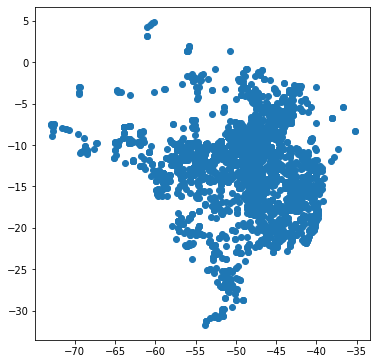

In [15]:
# Realiza um plot básico.
filtrado.plot(figsize=(6,12))

# Aplicações estatísticas

Realiza a média das variáveis meteorológicas para cada "id".

In [16]:
filtrado.groupby('id').mean()

,Lat,Lon,RH,TEMP,PREC,NDCS,index_right
id,,,,,,,
10.0,-7.633100,-72.865950,50.20,30.315793,0.000000,3.5,2.0
11.0,-8.611050,-72.768400,29.90,27.197030,0.000000,2.0,3.0
39.0,-7.586667,-72.293900,76.00,27.485680,0.000000,6.0,6.0
68.0,-8.111200,-70.989167,45.10,30.528720,0.000000,4.0,14.0
94.0,-3.268080,-69.442040,44.72,32.561534,0.000000,7.6,22.0
...,...,...,...,...,...,...,...
763.0,-6.763825,-38.121575,36.20,31.723515,0.000000,2.5,438.0
767.0,-11.658650,-38.047450,60.20,27.511835,0.000000,13.5,442.0
791.0,-5.460350,-36.722300,25.80,33.450000,0.000000,5.0,446.0


<AxesSubplot:>

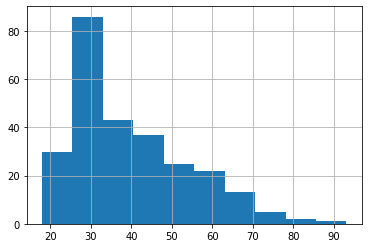

In [17]:
# Gera um histrograma de RH.
filtrado.groupby('id').RH.mean().hist()

In [18]:
filtrado.id.value_counts()

419.0    237
420.0    171
506.0    134
592.0    130
563.0    120
        ... 
434.0      1
129.0      1
571.0      1
544.0      1
338.0      1
Name: id, Length: 264, dtype: int64

In [19]:
# Consultando o "id=419" que teve mais células com focos.
filtrado.query('id==419.0')

,Dia,Lat,Lon,RH,TEMP,PREC,NDCS,geometry,index_right,id
249,2022-06-02,-10.9119,-54.2532,38.3,32.24871,0.0,18,POINT (-54.25320 -10.91190),196,419.0
251,2022-06-02,-10.9133,-54.2634,38.3,32.24871,0.0,18,POINT (-54.26340 -10.91330),196,419.0
252,2022-06-02,-11.1308,-53.8814,29.1,34.94869,0.0,19,POINT (-53.88140 -11.13080),196,419.0
255,2022-06-02,-11.1322,-53.8913,29.1,34.94869,0.0,19,POINT (-53.89130 -11.13220),196,419.0
260,2022-06-02,-11.3546,-54.9003,39.4,32.84872,0.0,19,POINT (-54.90030 -11.35460),196,419.0
...,...,...,...,...,...,...,...,...,...,...
4362,2022-06-21,-12.1933,-54.3232,23.8,32.90231,0.0,49,POINT (-54.32320 -12.19330),196,419.0
4363,2022-06-21,-12.1955,-54.3369,23.8,32.90231,0.0,49,POINT (-54.33690 -12.19550),196,419.0
4364,2022-06-21,-12.1976,-54.3504,23.8,32.90231,0.0,49,POINT (-54.35040 -12.19760),196,419.0
4572,2022-06-21,-11.0245,-54.2058,23.9,33.00231,0.0,11,POINT (-54.20580 -11.02450),196,419.0


In [20]:
# Salva a média do agrupamento por "id" na variável "media".
media = filtrado.groupby('id').mean()

In [21]:
# Guarda apenas as colunas "RH" e "TEMP".
media = media[['RH', 'TEMP']]

In [22]:
# Apenas visualiza novamente o shapefile aberto.
brasil

,id,left,top,right,bottom,geometry
0,8.0,-73.99045,-4.178159,-72.64045,-5.528159,"POLYGON ((-73.99378 -4.14148, -72.64378 -4.141..."
1,9.0,-73.99045,-5.528159,-72.64045,-6.878159,"POLYGON ((-73.99378 -5.49148, -72.64378 -5.491..."
2,10.0,-73.99045,-6.878159,-72.64045,-8.228159,"POLYGON ((-73.99378 -6.84148, -72.64378 -6.841..."
3,11.0,-73.99045,-8.228159,-72.64045,-9.578159,"POLYGON ((-73.99378 -8.19148, -72.64378 -8.191..."
4,37.0,-72.64045,-4.178159,-71.29045,-5.528159,"POLYGON ((-72.64378 -4.14148, -71.29378 -4.141..."
...,...,...,...,...,...,...
453,821.0,-36.19045,-5.528159,-34.84045,-6.878159,"POLYGON ((-36.19378 -5.49148, -34.84378 -5.491..."
454,822.0,-36.19045,-6.878159,-34.84045,-8.228159,"POLYGON ((-36.19378 -6.84148, -34.84378 -6.841..."
455,823.0,-36.19045,-8.228159,-34.84045,-9.578159,"POLYGON ((-36.19378 -8.19148, -34.84378 -8.191..."
456,824.0,-36.19045,-9.578159,-34.84045,-10.928159,"POLYGON ((-36.19378 -9.54148, -34.84378 -9.541..."


# Merge do shapefile e da média agrupada por id

In [23]:
merge_gdf = pd.merge(brasil, media, on='id', how='left')

Foi usado o `how='left'` porque sem ele seriam retornadas as células de grade onde tem focos. Sabe-se que nem todas as células possuem focos. Por isso, o uso do `how='left'` para guardar as células vazias.

In [24]:
# Visualiação do geodataframe.
merge_gdf

,id,left,top,right,bottom,geometry,RH,TEMP
0,8.0,-73.99045,-4.178159,-72.64045,-5.528159,"POLYGON ((-73.99378 -4.14148, -72.64378 -4.141...",NaN,NaN
1,9.0,-73.99045,-5.528159,-72.64045,-6.878159,"POLYGON ((-73.99378 -5.49148, -72.64378 -5.491...",NaN,NaN
2,10.0,-73.99045,-6.878159,-72.64045,-8.228159,"POLYGON ((-73.99378 -6.84148, -72.64378 -6.841...",50.2,30.315793
3,11.0,-73.99045,-8.228159,-72.64045,-9.578159,"POLYGON ((-73.99378 -8.19148, -72.64378 -8.191...",29.9,27.197030
4,37.0,-72.64045,-4.178159,-71.29045,-5.528159,"POLYGON ((-72.64378 -4.14148, -71.29378 -4.141...",NaN,NaN
...,...,...,...,...,...,...,...,...
453,821.0,-36.19045,-5.528159,-34.84045,-6.878159,"POLYGON ((-36.19378 -5.49148, -34.84378 -5.491...",NaN,NaN
454,822.0,-36.19045,-6.878159,-34.84045,-8.228159,"POLYGON ((-36.19378 -6.84148, -34.84378 -6.841...",NaN,NaN
455,823.0,-36.19045,-8.228159,-34.84045,-9.578159,"POLYGON ((-36.19378 -8.19148, -34.84378 -8.191...",76.8,25.350000
456,824.0,-36.19045,-9.578159,-34.84045,-10.928159,"POLYGON ((-36.19378 -9.54148, -34.84378 -9.541...",NaN,NaN


In [25]:
# Checa se é geodataframe.
type(merge_gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

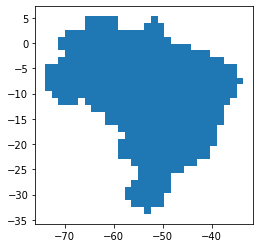

In [26]:
# Plot básico.
merge_gdf.plot()

In [27]:
# Caso queira salvar o resultado em um arquivo shapefile.
merge_gdf.to_file('/mnt/d/gui/testes/grade150km/shapefile/grade150km.shp')

/home/gui/anaconda3/envs/trabalho/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
